### IMPORTING THE PACKAGES

In [1]:
# importing the packages
%matplotlib inline      
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
from datetime import datetime 

### READING THE DATASETS

In [2]:
# reading the datasets
impression = pd.read_csv('172.31.4.99_jsonimpr.log.csv')
capacity = pd.read_csv('172.31.4.99_jsoncapacity.log.csv')
click = pd.read_csv('172.31.4.99_jsonclick.log.csv')
pixel_shopclues = pd.read_csv('pixel_json_shopclues-2019-06-07-09_01_06.csv')
pixel = pd.read_csv('pixel_json-2019-06-07-09_00_23.csv')

### STATISTICAL REPORT OF EACH OF THE DATASETS

In [3]:
pandas_profiling.ProfileReport(impression)
#pandas_profiling.ProfileReport(impression)
#pandas_profiling.ProfileReport(impression)
#pandas_profiling.ProfileReport(impression)

Number of variables,18
Number of observations,3532
Total Missing (%),0.0%
Total size in memory,496.8 KiB
Average record size in memory,144.0 B
Numeric,6
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,5


### LOOKING AT THE BASIC STRUCTURE OF THE DATASETS

In [4]:
# getting the number of rows and columns in the impression dataset
impression.shape

(3532, 18)

In [5]:
# listing the different column names in the impression dataset
list(impression)

['Time',
 'AdvPixelId',
 'Env',
 'AccountID',
 'EventType',
 'CampaignType',
 'PageType',
 'CampaignId',
 'KeywordId',
 'PID',
 'CID',
 'MCID',
 'CH',
 'AT',
 'SLOT',
 'CPC',
 'UserIP',
 'UUID']

In [6]:
# fetching the first 5 rows of the impression dataset
impression.head()

,Time,AdvPixelId,Env,AccountID,EventType,CampaignType,PageType,CampaignId,KeywordId,PID,CID,MCID,CH,AT,SLOT,CPC,UserIP,UUID
0,2019-06-07 09:00:00,99999,PRD,1,IMPRESSION,CATEGORY,PDP,73572,undefined,145385919,32862,32644,A,R,1,2.0,49.35.239.175,ba05bbc3d20a978d
1,2019-06-07 09:00:00,99999,PRD,1,IMPRESSION,CATEGORY,PDP,73516,undefined,145456352,32862,32644,A,R,4,1.0,49.35.239.175,ba05bbc3d20a978d
2,2019-06-07 09:00:00,99999,PRD,1,IMPRESSION,CATEGORY,PDP,62447,undefined,140406517,205,87,A,R,10,1.5,157.41.105.74,8f80d862c20f3f3f
3,2019-06-07 09:00:00,99999,PRD,1,IMPRESSION,CATEGORY,PDP,73515,undefined,146264146,32862,32644,A,R,3,1.0,49.35.239.175,ba05bbc3d20a978d
4,2019-06-07 09:00:00,99999,PRD,1,IMPRESSION,CATEGORY,PDP,73513,undefined,146133656,32862,32644,A,R,2,1.0,49.35.239.175,ba05bbc3d20a978d


In [7]:
# fetching the last 5 rows of the impression dataset
impression.tail()

,Time,AdvPixelId,Env,AccountID,EventType,CampaignType,PageType,CampaignId,KeywordId,PID,CID,MCID,CH,AT,SLOT,CPC,UserIP,UUID
3527,2019-06-07 09:00:59,99999,PRD,1,IMPRESSION,CATEGORY,PDP,71978,undefined,143495743,1551,89,A,R,10,1.0,47.30.153.245,3038b073bdde41f4
3528,2019-06-07 09:00:59,99999,PRD,1,IMPRESSION,CATEGORY,PDP,72253,undefined,89076237,61645,337,A,R,2,3.0,106.205.137.198,b3ac0b468a376b6d
3529,2019-06-07 09:00:59,99999,PRD,1,IMPRESSION,CATEGORY,PDP,72269,undefined,95890137,61645,337,A,R,3,3.0,171.48.72.126,b3ac0b468a376b6d
3530,2019-06-07 09:00:59,99999,PRD,1,IMPRESSION,CATEGORY,PDP,71473,undefined,139986631,1506,453,A,R,10,2.0,157.44.206.49,fd163a467458896b
3531,2019-06-07 09:00:59,99999,PRD,1,IMPRESSION,CATEGORY,PDP,71472,undefined,129592097,1506,453,A,R,9,2.0,157.44.206.49,fd163a467458896b


### SUMMARIZATION OF INDIVIDUAL VARIABLES:
1)MEASURES OF CENTRAL DEPENDENCY
2)MEASURES OF DISPERSION

In [8]:
# getting the measures of central dependency (mean, mode, median) 
# and measures of dispersion (interquartile range, range, standard deviation) 
# of all the columns in the impression dataset
impression.describe(include='all')

,Time,AdvPixelId,Env,AccountID,EventType,CampaignType,PageType,CampaignId,KeywordId,PID,CID,MCID,CH,AT,SLOT,CPC,UserIP,UUID
count,3532,3532.0,3532,3532.0,3532,3532,3532,3532.000000,3532,3.532000e+03,3532.000000,3532.000000,3532,3532,3532.000000,3532.000000,3532,3532
unique,60,NaN,1,NaN,1,2,2,NaN,1,NaN,NaN,NaN,3,3,NaN,NaN,566,506
top,2019-06-07 09:00:01,NaN,PRD,NaN,IMPRESSION,CATEGORY,PDP,NaN,undefined,NaN,NaN,NaN,A,R,NaN,NaN,223.182.16.32,undefined
freq,116,NaN,3532,NaN,3532,3520,3173,NaN,3532,NaN,NaN,NaN,3344,3173,NaN,NaN,30,34
mean,NaN,99999.0,NaN,1.0,NaN,NaN,NaN,64425.515855,NaN,1.239284e+08,22011.368347,5524.917044,NaN,NaN,4.840600,1.189312,NaN,NaN
std,NaN,0.0,NaN,0.0,NaN,NaN,NaN,8120.654643,NaN,2.354561e+07,24732.241102,12405.760033,NaN,NaN,2.973938,0.729863,NaN,NaN
min,NaN,99999.0,NaN,1.0,NaN,NaN,NaN,4588.000000,NaN,1.000050e+05,90.000000,85.000000,NaN,NaN,1.000000,0.100000,NaN,NaN
25%,NaN,99999.0,NaN,1.0,NaN,NaN,NaN,59022.000000,NaN,1.105209e+08,281.000000,87.000000,NaN,NaN,2.000000,0.500000,NaN,NaN
50%,NaN,99999.0,NaN,1.0,NaN,NaN,NaN,63055.500000,NaN,1.331582e+08,1662.000000,282.000000,NaN,NaN,5.000000,1.000000,NaN,NaN
75%,NaN,99999.0,NaN,1.0,NaN,NaN,NaN,71659.000000,NaN,1.411142e+08,42974.000000,480.000000,NaN,NaN,7.000000,1.500000,NaN,NaN


### CHECKING FOR UNIQUE VALUES

In [9]:
# returns the count of unique values in each column of the impression dataset
impression.nunique()

Time              60
AdvPixelId         1
Env                1
AccountID          1
EventType          1
CampaignType       2
PageType           2
CampaignId      2062
KeywordId          1
PID             2061
CID              202
MCID              15
CH                 3
AT                 3
SLOT              10
CPC               19
UserIP           566
UUID             506
dtype: int64

## DATA CLEANING 

### 1)CHECKING FOR NULL VALUES

In [10]:
# finds the number of null values in each column of the impression dataset
impression.isnull().sum()

Time            0
AdvPixelId      0
Env             0
AccountID       0
EventType       0
CampaignType    0
PageType        0
CampaignId      0
KeywordId       0
PID             0
CID             0
MCID            0
CH              0
AT              0
SLOT            0
CPC             0
UserIP          0
UUID            0
dtype: int64

### 2)REMOVING IRRELEVANT DATA

In [11]:
# required columns of the dataset can be selected
d = impression[['CID', 'UUID']]
print(d)
d = pd.DataFrame(d)

        CID                              UUID
0     32862                  ba05bbc3d20a978d
1     32862                  ba05bbc3d20a978d
2       205                  8f80d862c20f3f3f
3     32862                  ba05bbc3d20a978d
4     32862                  ba05bbc3d20a978d
5     35751                  d1dcf626b41e5790
6     35751                  d1dcf626b41e5790
7     35751                  d1dcf626b41e5790
8     32862                  ba05bbc3d20a978d
9     32862                  ba05bbc3d20a978d
10    32862                  ba05bbc3d20a978d
11    32862                  ba05bbc3d20a978d
12     1506                  d7e9193441b30f72
13     1506                  d7e9193441b30f72
14     3550                  5b03d4a28bebfa67
15     3550                  5b03d4a28bebfa67
16     3550                  5b03d4a28bebfa67
17    32862                  ba05bbc3d20a978d
18    35751                  d1dcf626b41e5790
19    35751                  d1dcf626b41e5790
20    32862                  ba05b

## DATA PROCESSING

In [12]:
# grouping the new dataframe based on CID
impr = d.groupby(d.CID)
for i in impr:
    print(i)

(90,       CID              UUID
905    90  0df3464792ccdb8b
906    90  0df3464792ccdb8b
1038   90  5172cafbc5d5cc4a
1039   90  5172cafbc5d5cc4a)
(139,       CID             UUID
1116  139  23d3ad934ff33d6
1117  139  23d3ad934ff33d6
1846  139  23d3ad934ff33d6
1852  139  23d3ad934ff33d6)
(155,       CID              UUID
30    155  b45550a76d563973
32    155  b45550a76d563973
220   155  5657630af9d6fdc7
222   155  5657630af9d6fdc7
372   155  f54c0641b3107c0b
373   155  f54c0641b3107c0b
1410  155  c75a4e1b3e576cfa
1411  155  c75a4e1b3e576cfa
1412  155  c75a4e1b3e576cfa
1414  155  c75a4e1b3e576cfa
1417  155  c75a4e1b3e576cfa
1418  155  c75a4e1b3e576cfa
1419  155  c75a4e1b3e576cfa
1420  155  c75a4e1b3e576cfa
1424  155  c75a4e1b3e576cfa
1425  155  c75a4e1b3e576cfa
2620  155  515771140728beb4
2626  155  515771140728beb4
2627  155  515771140728beb4
2628  155  515771140728beb4
2634  155  515771140728beb4
2641  155  515771140728beb4
2643  155  515771140728beb4
2644  155  515771140728beb4
2650  

2004  32764  D7913A44249E43B98C13B364C8F58951)
(32770,         CID              UUID
63    32770  81e796f66e14fe46
90    32770  81e796f66e14fe46
91    32770  81e796f66e14fe46
92    32770  81e796f66e14fe46
105   32770  81e796f66e14fe46
125   32770  81e796f66e14fe46
126   32770  81e796f66e14fe46
129   32770  81e796f66e14fe46
130   32770  81e796f66e14fe46
142   32770  81e796f66e14fe46
262   32770  b0ddd75b4dd4c745
264   32770  b0ddd75b4dd4c745
265   32770  b0ddd75b4dd4c745
267   32770  b0ddd75b4dd4c745
274   32770  b0ddd75b4dd4c745
275   32770  b0ddd75b4dd4c745
276   32770  b0ddd75b4dd4c745
277   32770  b0ddd75b4dd4c745
280   32770  b0ddd75b4dd4c745
281   32770  b0ddd75b4dd4c745
985   32770  f065198df64d2796
988   32770  f065198df64d2796
994   32770  f065198df64d2796
995   32770  f065198df64d2796
1001  32770  f065198df64d2796
1002  32770  f065198df64d2796
1008  32770  f065198df64d2796
1010  32770  f065198df64d2796
1020  32770  f065198df64d2796
1022  32770  f065198df64d2796
1740  32770  0d

3252  64232  98d62464fa23b516)
(64291,         CID              UUID
1568  64291  151a45ae3fb24577
1573  64291  151a45ae3fb24577
1576  64291  151a45ae3fb24577
1581  64291  151a45ae3fb24577
1605  64291  151a45ae3fb24577
1606  64291  151a45ae3fb24577
1621  64291  151a45ae3fb24577
1623  64291  151a45ae3fb24577
1633  64291  151a45ae3fb24577
1634  64291  151a45ae3fb24577)
(64679,         CID              UUID
1653  64679  6df9dbe0cf24414d)
(64811,         CID                              UUID
2172  64811  A2BCED22A8714983BDF0A38FB7DC43C8)
(65255,         CID       UUID
1107  65255  undefined
1130  65255  undefined)
(66424,         CID                              UUID
646   66424  91034F3FDB164653A887E1AED3DC3467
652   66424  91034F3FDB164653A887E1AED3DC3467
2459  66424                  184289c93e0cd847
2463  66424                  184289c93e0cd847
2467  66424                  184289c93e0cd847
2470  66424                  184289c93e0cd847
2473  66424                  184289c93e0cd847
2480  

In [13]:
# applying lambda function to group unique UUIDs into a list per CID
category = impr.apply(lambda x:x['UUID'].unique())
category = pd.DataFrame(category)
print(category)

                                                       0
CID                                                     
90                  [0df3464792ccdb8b, 5172cafbc5d5cc4a]
139                                    [23d3ad934ff33d6]
155    [b45550a76d563973, 5657630af9d6fdc7, f54c0641b...
166                                   [39773dab27a10456]
170                   [C9656079D3BF40AE91A9C2836287009E]
186    [73113d97ec87c10a, 457c8af973b52fce, fe9b3d010...
193    [205d1fed2993cda9, a21eaed5b304afd4, 87307d3ce...
194    [B545EE918BDD49048623B71D937151F8, 7f49400c6e1...
205    [8f80d862c20f3f3f, 98e4ea1ad9db4c3, f9f8a7f34f...
206    [72f15a850b4760d3, 62c3de8edf797889, 4672fa7c3...
218    [ba9d2ccb7c0db206, b8d7b269b5560885, 34d59f1b0...
220    [46881aaba730b56b, d3809760418e9f0e, 884a0ce8e...
221                                          [undefined]
249                 [21f5709c04982560, f56db41ff15288f5]
251    [a2eec9c09b929e01, ee00552a0bcbbffb, 182b797fa...
252    [4b7f1ee2d0af339, 1fc761

In [14]:
# creating a dictionary with CID as key and count of unique UUIDs as value
top = {}
for index,row in category.iterrows():
    top.update({index:0})
    for i in row:
        c = len(i)
    top[index]=c
        
print(top)

{90: 2, 139: 1, 155: 7, 166: 1, 170: 1, 186: 4, 193: 10, 194: 5, 205: 24, 206: 9, 218: 23, 220: 6, 221: 1, 249: 2, 251: 4, 252: 4, 254: 1, 256: 3, 258: 4, 264: 2, 272: 7, 273: 1, 281: 10, 351: 8, 365: 1, 370: 1, 375: 1, 437: 2, 597: 1, 633: 1, 1215: 4, 1241: 1, 1338: 8, 1350: 2, 1366: 16, 1371: 1, 1372: 1, 1416: 2, 1433: 4, 1506: 14, 1551: 28, 1557: 8, 1558: 4, 1561: 1, 1579: 1, 1641: 1, 1662: 2, 1737: 1, 1746: 2, 1885: 1, 2020: 2, 2042: 2, 2181: 1, 2211: 1, 2394: 1, 2398: 1, 2400: 1, 3314: 1, 3550: 1, 3598: 1, 10254: 1, 15957: 6, 16426: 1, 18130: 3, 18237: 2, 18253: 1, 18283: 5, 18285: 2, 18287: 1, 18289: 1, 18291: 3, 18295: 1, 18596: 3, 19392: 1, 19516: 1, 20388: 1, 20396: 1, 20400: 1, 21024: 1, 22388: 1, 29172: 4, 29200: 1, 29212: 1, 32734: 1, 32740: 3, 32758: 2, 32760: 5, 32764: 1, 32770: 4, 32772: 2, 32854: 1, 32860: 6, 32862: 16, 32864: 2, 34602: 1, 35701: 1, 35751: 4, 37591: 1, 37598: 1, 37603: 1, 37632: 1, 37680: 1, 37691: 1, 37715: 1, 38469: 1, 38779: 2, 38814: 1, 38821: 1, 38

In [15]:
# converting the dictionary into a list
# sorting the list based on the number of unique UUIDs per CID, in non-increasing order
def sortSecond(val): 
    return val[1]  
topCategory = [ [k,v] for k, v in top.items() ]
topCategory.sort(key = sortSecond, reverse=True)  
print(topCategory) 

[[1551, 28], [205, 24], [218, 23], [1366, 16], [32862, 16], [1506, 14], [193, 10], [281, 10], [44423, 10], [206, 9], [61645, 9], [351, 8], [1338, 8], [1557, 8], [155, 7], [272, 7], [43296, 7], [61305, 7], [61867, 7], [220, 6], [15957, 6], [32860, 6], [194, 5], [18283, 5], [32760, 5], [186, 4], [251, 4], [252, 4], [258, 4], [1215, 4], [1433, 4], [1558, 4], [29172, 4], [32770, 4], [35751, 4], [61849, 4], [61969, 4], [256, 3], [18130, 3], [18291, 3], [18596, 3], [32740, 3], [38822, 3], [40558, 3], [42928, 3], [43232, 3], [60664, 3], [61278, 3], [61792, 3], [63833, 3], [90, 2], [249, 2], [264, 2], [437, 2], [1350, 2], [1416, 2], [1662, 2], [1746, 2], [2020, 2], [2042, 2], [18237, 2], [18285, 2], [32758, 2], [32772, 2], [32864, 2], [38779, 2], [42917, 2], [42930, 2], [42974, 2], [43762, 2], [46741, 2], [46742, 2], [58871, 2], [60976, 2], [60987, 2], [61140, 2], [61141, 2], [61646, 2], [61676, 2], [61686, 2], [61787, 2], [61870, 2], [62384, 2], [63312, 2], [63732, 2], [64232, 2], [66424, 2],

In [16]:
# converting the format of the list topCategory
df  = {'CID': [], 'UUID': []}
for i in topCategory:
    df['CID'].append(i[0])
    df['UUID'].append(i[1])
# converting the dictionary to a DataFrame
df = pd.DataFrame(df)    
print(df)

       CID  UUID
0     1551    28
1      205    24
2      218    23
3     1366    16
4    32862    16
5     1506    14
6      193    10
7      281    10
8    44423    10
9      206     9
10   61645     9
11     351     8
12    1338     8
13    1557     8
14     155     7
15     272     7
16   43296     7
17   61305     7
18   61867     7
19     220     6
20   15957     6
21   32860     6
22     194     5
23   18283     5
24   32760     5
25     186     4
26     251     4
27     252     4
28     258     4
29    1215     4
..     ...   ...
172  61307     1
173  61324     1
174  61631     1
175  61643     1
176  61647     1
177  61658     1
178  61685     1
179  61693     1
180  61699     1
181  61794     1
182  62372     1
183  62386     1
184  62391     1
185  62394     1
186  62406     1
187  62415     1
188  62423     1
189  62432     1
190  62434     1
191  62439     1
192  62441     1
193  62477     1
194  62541     1
195  63752     1
196  64291     1
197  64679     1
198  64811    

In [17]:
# extracting the top 5 categories
n = df.head()
print(n)

     CID  UUID
0   1551    28
1    205    24
2    218    23
3   1366    16
4  32862    16


## DATA VISUALISATION

### VISUALISATION 1

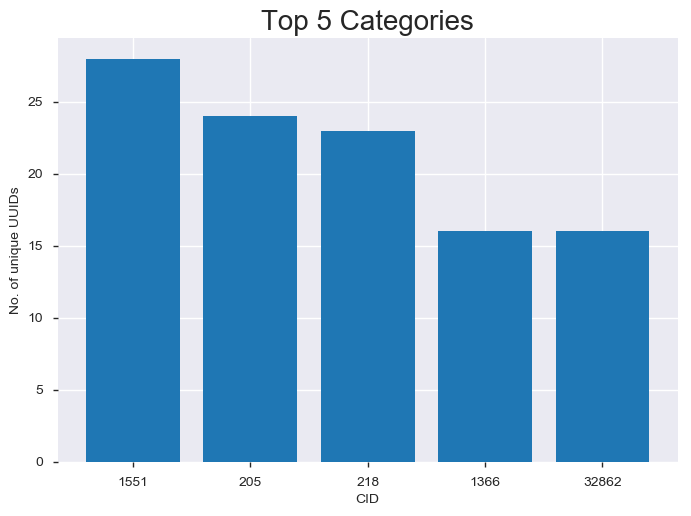

In [18]:
# plotting the number of unique users w.r.t. CID 
y_pos = np.arange(len(n['CID']))
plt.bar(y_pos,n['UUID'])
plt.xticks(y_pos, n['CID'],fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('CID',fontsize=10)
plt.ylabel('No. of unique UUIDs',fontsize=10)
plt.title('Top 5 Categories',fontsize=20)
plt.show()

### VISUALISATION 2

Text(0,0.5,'No. of users')

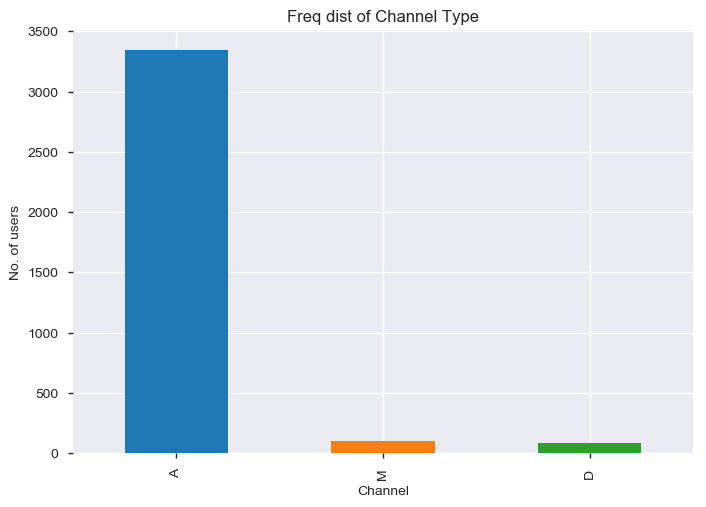

In [19]:
# plotting number of users for each channel
impression['CH'].value_counts().plot.bar(title="Freq dist of Channel Type")
plt.xlabel('Channel',fontsize=10)
plt.ylabel('No. of users',fontsize=10)

### VISUALISATION 3

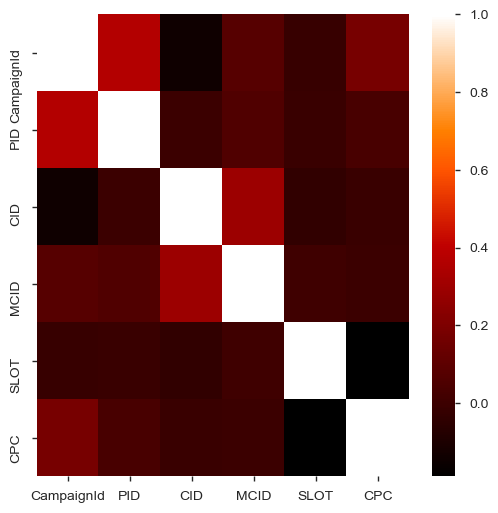

In [20]:
# getting the correlation matrix 
f, ax = plt.subplots(figsize=(6, 6))
corr = impression.drop(['AdvPixelId','AccountID'],axis=1).corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap='gist_heat')

### VISUALISATION 4

In [21]:
# selecting seen and ts column from pixel_shopclues log to find how many new users have been discovered
d = pixel_shopclues[['seen', 'ts']]
print(d)
d = pd.DataFrame(d)

       seen             ts
0     False  1559898064765
1      True  1559898064815
2     False  1559898065021
3      True  1559898065039
4     False  1559898065148
5     False  1559898065284
6     False  1559898065332
7     False  1559898065341
8      True  1559898065379
9     False  1559898065423
10    False  1559898065525
11     True  1559898065599
12    False  1559898065638
13    False  1559898065659
14     True  1559898065767
15    False  1559898065815
16    False  1559898065835
17     True  1559898065883
18     True  1559898065945
19    False  1559898066048
20     True  1559898066092
21     True  1559898066134
22    False  1559898066224
23     True  1559898066244
24     True  1559898066372
25     True  1559898066477
26    False  1559898066506
27    False  1559898066621
28    False  1559898066727
29    False  1559898066843
...     ...            ...
1258   True  1559898181006
1259  False  1559898181086
1260   True  1559898181128
1261  False  1559898181251
1262   True  1559898181302
1

In [ ]:
#Converting unix time stamp into readable date
y = pixel_shopclues.iloc[:,22]
y = list(y)
for i in range(len(y)):
    y[i] /=1000
    # if you encounter a "year is out of range" error the timestamp    
    # may be in milliseconds, try `ts /= 1000` in that case
    y[i] = datetime.utcfromtimestamp(y[i]).strftime('%Y-%m-%d %H:%M:%S')
print(y)

In [ ]:
#Counting number of users discovered between a timestamp
tsb = input("Enter the start date in yyyy-mm-dd hh:mm:ss")
tse = input("Enter the end date in yyyy-mm-dd hh:mm:ss")
X = pixel_shopclues.iloc[:,20]
X = list(X)
t=0
f=0
for i in range(len(X)):
    if((int(y[i][:4]) <= int(tse[:4])) and (int(y[i][5:7]) <= int(tse[5:7])) and (int(y[i][8:10]) <= int(tse[8:10])) and (int(y[i][11:13]) <= int(tse[11:13])) and (int(y[i][14:16]) <= int(tse[14:16])) and (int(y[i][17:19]) <= int(tse[17:19]))):
        if(X[i]==True):
            t+=1
        else:
            f+=1
print("Number of new users is between {} and {} is {}" .format(tsb,tse,f))

In [ ]:
x = np.arange(2)
usersDiscovered = [t,f]
fig, ax = plt.subplots()
plt.bar(x, money)
plt.xticks(x, ('Old Users', 'New Users'))
plt.title('Users from {} to {}'.format(tsb,tse))
plt.show()

### VISUALISATION 5

In [ ]:
df = capacity[['CID','Na','Ns']]
df = pd.DataFrame(df)
x=0
te=[]
vacant=[]
complete = []
for index,row in df.iterrows():
    for j in row:
        if not(x==0):
            te.append(j)
        else:
            c = j
        x+=1
    x=0 
   diff = te[1]-te[0]
    if(diff!=0):
        te.append(c)
        vacant.append(te)
    else:        te.append(c)
        complete.append(te)
    te=[]
print(len(vacant),len(complete))

In [ ]:
x = np.arange(2)
servedVsAvailable = [len(vacant),len(complete)]
fig, ax = plt.subplots()
plt.bar(x,servedVsAvailable)
plt.xticks(x, ('Served Completely', 'Not Served Completely'))
plt.title('Number of Categories which served Native ADs in all the slots available to it')
plt.show()